### 주가의 수익률의 상관성을 관찰한다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

#### Yahoo 사이트에서 삼성전자, S-OIL, SK이노베이션, LG화학 주가 데이터를 읽어온다

In [2]:
sams = pd.read_csv('./stockData/005930.csv', index_col=0, parse_dates=True)
sams = sams.sort_index()
sams = sams.dropna()

soil = pd.read_csv('./stockData/010950.csv', index_col=0, parse_dates=True)
soil = soil.sort_index()
soil = soil.dropna()

skin = pd.read_csv('./stockData/096770.csv', index_col=0, parse_dates=True)
skin = skin.sort_index()
skin = skin.dropna()

lgch = pd.read_csv('./stockData/051910.csv', index_col=0, parse_dates=True)
lgch = lgch.sort_index()
lgch = lgch.dropna()

#### 종가를 기준으로 일일 수익률을 계산한다.

In [54]:
sams['Rtn'] = np.log(sams['close']) - np.log(sams['close'].shift(1))
soil['Rtn'] = np.log(soil['close']) - np.log(soil['close'].shift(1))
skin['Rtn'] = np.log(skin['close']) - np.log(skin['close'].shift(1))
lgch['Rtn'] = np.log(lgch['close']) - np.log(lgch['close'].shift(1))

#### 종목별 수익률로 새로운 데이터프레임을 만든다

In [58]:
p = pd.DataFrame()
p['Samsung'] = sams['Rtn']
p['S-oil'] = soil['Rtn']
p['SK-inovation'] = skin['Rtn']
p['LG-chemical'] = lgch['Rtn']
p = p.dropna()

In [59]:
p.head()

,Samsung,S-oil,SK-inovation,LG-chemical
date,,,,
2011-05-13,0.034429,-0.015038,-0.028237,-0.017163
2011-05-16,-0.016511,0.048068,0.021252,0.002035
2011-05-17,-0.012284,0.021429,0.011615,0.005068
2011-05-18,0.003365,0.017514,0.031821,0.036729
2011-05-19,-0.014665,-0.021053,-0.015784,-0.011765


#### 종목별 수익률의 상관관계를 관찰한다

In [60]:
print("종목별 수익률 상관관계")
print(p.corr())

종목별 수익률 상관관계
               Samsung     S-oil  SK-inovation  LG-chemical
Samsung       1.000000  0.191493      0.229778     0.282505
S-oil         0.191493  1.000000      0.789494     0.533333
SK-inovation  0.229778  0.789494      1.000000     0.566731
LG-chemical   0.282505  0.533333      0.566731     1.000000


#### 종목별 산점도를 그린다

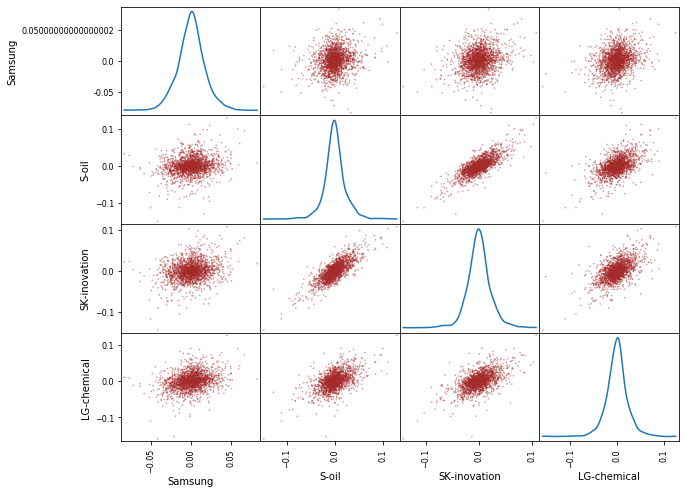

In [61]:
scatter_matrix(p, figsize=(10,8), diagonal='kde', color='brown', marker='o', s=2.5)
plt.show()